## Load data



In [1]:
import numpy as np
## Progress bar
from tqdm.auto import tqdm
import pylab as plt
import copy
import time
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
# mount the Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%pwd

'/content'

In [4]:
# goto to data folder -- you may need to change this location
%cd /content/drive/MyDrive/DSA4262/dataset/sagittal/

/content/drive/MyDrive/DSA4262/dataset/sagittal


In [5]:
%ls

0005.npy  0128.npy  0272.npy  0439.npy  0558.npy  0685.npy  0841.npy  0953.npy  1051.npy
0014.npy  0132.npy  0290.npy  0443.npy  0563.npy  0689.npy  0847.npy  0955.npy  1052.npy
0017.npy  0139.npy  0291.npy  0444.npy  0567.npy  0695.npy  0855.npy  0960.npy  1054.npy
0022.npy  0144.npy  0296.npy  0459.npy  0568.npy  0700.npy  0856.npy  0965.npy  1063.npy
0023.npy  0159.npy  0299.npy  0472.npy  0571.npy  0702.npy  0858.npy  0966.npy  1064.npy
0024.npy  0170.npy  0316.npy  0475.npy  0580.npy  0703.npy  0859.npy  0969.npy  1069.npy
0025.npy  0177.npy  0336.npy  0478.npy  0583.npy  0704.npy  0861.npy  0981.npy  1070.npy
0026.npy  0183.npy  0337.npy  0492.npy  0587.npy  0706.npy  0867.npy  0983.npy  1072.npy
0027.npy  0184.npy  0342.npy  0493.npy  0588.npy  0711.npy  0868.npy  0984.npy  1075.npy
0037.npy  0202.npy  0352.npy  0494.npy  0589.npy  0722.npy  0876.npy  0992.npy  1076.npy
0041.npy  0206.npy  0377.npy  0495.npy  0594.npy  0727.npy  0877.npy  0995.npy  1079.npy
0043.npy  0207.npy  0

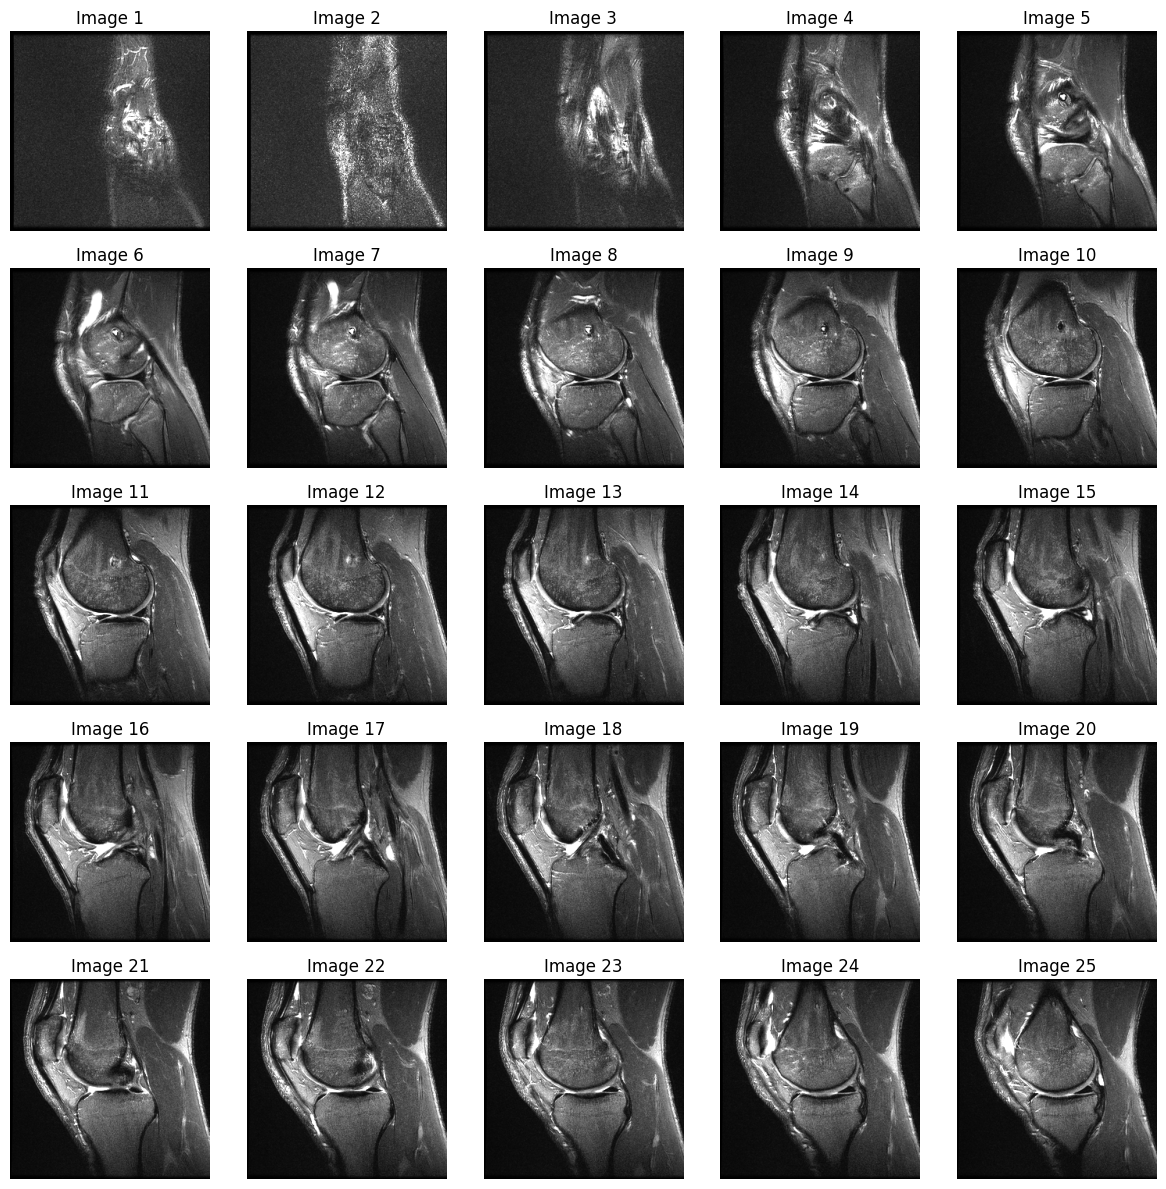

In [6]:
# Load the .npy file
file_path = '0005.npy'  # Replace with the path to your .npy file
loaded_array = np.load(file_path)

#loaded_array.shape

# Display all 25 images
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(loaded_array[i], cmap='gray')
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Sagittal

In [7]:
# goto to data folder -- you may need to change this location
%cd /content/drive/MyDrive/DSA4262/dataset/sagittal/

/content/drive/MyDrive/DSA4262/dataset/sagittal


In [8]:
# Load the "sagittal_train.npz" and "sagittal_val.npz" files
data_train = np.load("sagittal_train.npz")
data_val = np.load("sagittal_val.npz")

# List of image codes you want to process
keys1 = data_train.files
keys2 = data_val.files
image_codes = keys1 + keys2  # Replace with the image codes you want to use

X_train = []  # List to store training data
X_val = []    # List to store validation data

# Process each image code and append the arrays to the respective lists
for image_code in image_codes:
    if image_code in data_train:
        X_train.append(data_train[image_code].astype(np.uint8))
    if image_code in data_val:
        X_val.append(data_val[image_code].astype(np.uint8))

# Convert the lists to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)

csv_file_path = 'train-abnormal.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path, header=None)

image_codes_column = df.iloc[:, 0]
#image_codes_column = image_codes_column.astype(str)
image_codes_column = df.iloc[:, 0].astype(str).str.zfill(4)
labels_column = df.iloc[:, 1]

# Create Y_train and Y_val based on image codes and labels
Y_train = labels_column[image_codes_column.isin(keys1)].astype(int).values
Y_val = labels_column[image_codes_column.isin(keys2)].astype(int).values

<ipython-input-8-0795a5bf8ff5>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(X_train)
<ipython-input-8-0795a5bf8ff5>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_val = np.array(X_val)


In [9]:
# List the keys (array names) in the .npz file
keys = data_val.files
print("Keys in sagittal_train.npz:", keys)

Keys in sagittal_train.npz: ['0635', '0411', '1049', '0472', '0459', '0404', '0969', '1052', '0858', '0379', '0778', '0291', '0235', '1028', '0425', '0495', '0604', '0947', '0555', '0549', '0883', '0093', '1123', '0255', '0902', '0139', '1051', '0733', '0037', '0557', '0208', '0053', '0806', '0415', '0409', '0104', '0535', '0984', '0983', '0966', '0841', '0228', '0965', '0821', '0025', '0114', '0568', '0689', '0877', '0657']


In [10]:
X_train.shape

(200,)

In [11]:
X_train[0].shape

(21, 256, 256)

## Coronal

In [ ]:
# goto to data folder -- you may need to change this location
%cd /content/drive/MyDrive/DSA4262/dataset/coronal/

In [ ]:
# Load the "sagittal_train.npz" and "sagittal_val.npz" files
data_train = np.load("coronal_train.npz")
data_val = np.load("coronal_val.npz")

# List of image codes you want to process
keys1 = data_train.files
keys2 = data_val.files
image_codes = keys1 + keys2  # Replace with the image codes you want to use

X_train = []  # List to store training data
X_val = []    # List to store validation data

# Process each image code and append the arrays to the respective lists
for image_code in image_codes:
    if image_code in data_train:
        X_train.append(data_train[image_code].astype(np.uint8))
    if image_code in data_val:
        X_val.append(data_val[image_code].astype(np.uint8))

# Convert the lists to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)

csv_file_path = 'train-abnormal.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path, header=None)

image_codes_column = df.iloc[:, 0]
#image_codes_column = image_codes_column.astype(str)
image_codes_column = df.iloc[:, 0].astype(str).str.zfill(4)
labels_column = df.iloc[:, 1]

# Create Y_train and Y_val based on image codes and labels
Y_train = labels_column[image_codes_column.isin(keys1)].astype(int).values
Y_val = labels_column[image_codes_column.isin(keys2)].astype(int).values

## Axial

In [ ]:
# goto to data folder -- you may need to change this location
%cd /content/drive/MyDrive/DSA4262/dataset/axial/

In [ ]:
# Load the "sagittal_train.npz" and "sagittal_val.npz" files
data_train = np.load("axial_train.npz")
data_val = np.load("axial_val.npz")

# List of image codes you want to process
keys1 = data_train.files
keys2 = data_val.files
image_codes = keys1 + keys2  # Replace with the image codes you want to use

X_train = []  # List to store training data
X_val = []    # List to store validation data

# Process each image code and append the arrays to the respective lists
for image_code in image_codes:
    if image_code in data_train:
        X_train.append(data_train[image_code].astype(np.uint8))
    if image_code in data_val:
        X_val.append(data_val[image_code].astype(np.uint8))

# Convert the lists to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)

csv_file_path = 'train-abnormal.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path, header=None)

image_codes_column = df.iloc[:, 0]
#image_codes_column = image_codes_column.astype(str)
image_codes_column = df.iloc[:, 0].astype(str).str.zfill(4)
labels_column = df.iloc[:, 1]

# Create Y_train and Y_val based on image codes and labels
Y_train = labels_column[image_codes_column.isin(keys1)].astype(int).values
Y_val = labels_column[image_codes_column.isin(keys2)].astype(int).values

## Data preprocessing

In [21]:
# pick middle 3
for i in range(X_train.shape[0]):
    num_images = len(X_train[i])
    middle_index = num_images // 2

    # Ensure that there are at least 3 images
    start_index = max(0, middle_index - 1)
    end_index = min(num_images, middle_index + 2)

    # Select the middle 3 images
    X_train[i] = X_train[i][start_index:end_index]

In [13]:
from sklearn.model_selection import train_test_split

# Assuming X_train is your dataset and Y_train is your labels
num_samples = len(X_train)
height, width = X_train[0].shape[1:]

# Reshape each item in X_train to (3 * height * width,)
X_train_flattened = np.array([item.reshape(-1) for item in X_train])

# Split the data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train_flattened, Y_train, test_size=0.2, random_state=42)

## Logistic Regression

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [15]:
# Adjust the input shape based on the features' shape
input_shape = (X_train_flattened.shape[1],) # This assumes X_train_features has shape (num_samples, 40)


# Define a logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with appropriate loss and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

# Train the model on the training set
model.fit(X_train_split, Y_train_split, epochs=15, batch_size=64, validation_data=(X_val_split, Y_val_split))

# Evaluate the model on the validation set
eval_results = model.evaluate(X_val_split, Y_val_split)
accuracy_val = eval_results[1]
auc_val = eval_results[2]

print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")
print(f"Validation AUC: {auc_val:.4f}")

Epoch 1/15
3/3 [==============================] - 8s 239ms/step - loss: 3962.7200 - accuracy: 0.4375 - auc: 0.4419 - val_loss: 2397.5996 - val_accuracy: 0.5500 - val_auc: 0.5000
Epoch 2/15
3/3 [==============================] - 0s 32ms/step - loss: 1759.6309 - accuracy: 0.4812 - auc: 0.4775 - val_loss: 2157.8535 - val_accuracy: 0.4500 - val_auc: 0.5000
Epoch 3/15
3/3 [==============================] - 0s 29ms/step - loss: 1238.7126 - accuracy: 0.4812 - auc: 0.4700 - val_loss: 1194.1008 - val_accuracy: 0.5500 - val_auc: 0.5000
Epoch 4/15
3/3 [==============================] - 0s 33ms/step - loss: 860.3365 - accuracy: 0.5375 - auc: 0.5481 - val_loss: 969.9340 - val_accuracy: 0.4000 - val_auc: 0.4343
Epoch 5/15
3/3 [==============================] - 0s 35ms/step - loss: 530.8268 - accuracy: 0.5562 - auc: 0.5451 - val_loss: 777.4638 - val_accuracy: 0.5500 - val_auc: 0.5101
Epoch 6/15
3/3 [==============================] - 0s 28ms/step - loss: 506.1366 - accuracy: 0.6000 - auc: 0.6116 - val

### Feature extraction

In [22]:
# try with feature extraction

def extract_features(scan):
    # Example feature extraction: compute mean and standard deviation
    mean_value = np.mean(scan)
    std_value = np.std(scan)
    return [mean_value, std_value]

# Extract features for each bone (not for individual scans)
feature_matrix = []

for bone_scans in X_train:
    bone_features = []
    for scan in bone_scans:
        scan_features = extract_features(scan)
        bone_features.append(scan_features)

    # Ensure that each bone has the same number of features
    max_features = max(len(bone_features), 1)  # Ensure at least one feature per bone
    bone_features += [np.zeros_like(bone_features[0])] * (max_features - len(bone_features))
    feature_matrix.append(bone_features)

# Convert the feature matrix to a NumPy array
X_train_features = np.array(feature_matrix)
# Flatten each scan in X_train_processed
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)

# Flatten the labels if they are not already flattened
Y_train_flat = np.array(Y_train)

# Split the data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train_features, Y_train_flat, test_size=0.2, random_state=42)

In [26]:
# Adjust the input shape based on the features' shape
input_shape = (X_train_features.shape[1],)  # This assumes X_train_features has shape (num_samples, 40)

# Define a logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with appropriate loss and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

# Train the model on the training set
model.fit(X_train_split, Y_train_split, epochs=20, batch_size=32, validation_data=(X_val_split, Y_val_split))

# Evaluate the model on the validation set
eval_results = model.evaluate(X_val_split, Y_val_split)
accuracy_val = eval_results[1]
auc_val = eval_results[2]

print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")
print(f"Validation AUC: {auc_val:.4f}")

Epoch 1/20
5/5 [==============================] - 1s 67ms/step - loss: 30.3045 - accuracy: 0.4812 - auc_6: 0.5000 - val_loss: 25.9193 - val_accuracy: 0.5500 - val_auc_6: 0.5000
Epoch 2/20
5/5 [==============================] - 0s 15ms/step - loss: 29.4766 - accuracy: 0.4812 - auc_6: 0.5000 - val_loss: 25.1868 - val_accuracy: 0.5500 - val_auc_6: 0.5000
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 28.6437 - accuracy: 0.4812 - auc_6: 0.5000 - val_loss: 24.4530 - val_accuracy: 0.5500 - val_auc_6: 0.5000
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 27.7897 - accuracy: 0.4812 - auc_6: 0.5000 - val_loss: 23.7220 - val_accuracy: 0.5500 - val_auc_6: 0.5000
Epoch 5/20
5/5 [==============================] - 0s 15ms/step - loss: 26.9861 - accuracy: 0.4812 - auc_6: 0.5000 - val_loss: 22.9822 - val_accuracy: 0.5500 - val_auc_6: 0.5000
Epoch 6/20
5/5 [==============================] - 0s 14ms/step - loss: 26.1233 - accuracy: 0.4812 - auc_6: 0.5000 -